# General imports

In [1]:
from functions import *

# Setup workspace

In [2]:
dataset: list[str] = load_dataset(images_path)

model: any = load_model_resnet50()

loss_fn: any = nn.CrossEntropyLoss()

# Fast Gradient Sign Method attack against ResNet-50

In [3]:
triplas: list[tuple[torch.Tensor, torch.Tensor, torch.Tensor]] = []

for image in dataset[:1]:

    original_image: torch.Tensor = read_image(image)
    original_image = preprocess(original_image)
    
    perturbed_image: torch.Tensor = fgsm_attack(model, loss_fn, original_image, epsilon_fgsm)
    
    original_image = postprocess(original_image)
    perturbed_image = postprocess(perturbed_image)
    
    noise: torch.Tensor = perturbed_image - original_image
    
    tripla: tuple[torch.Tensor, torch.Tensor, torch.Tensor] = (original_image, noise, perturbed_image)
    triplas.append(tripla)
   
    del image, original_image, perturbed_image, noise, tripla

del dataset, loss_fn

# Visualization of results

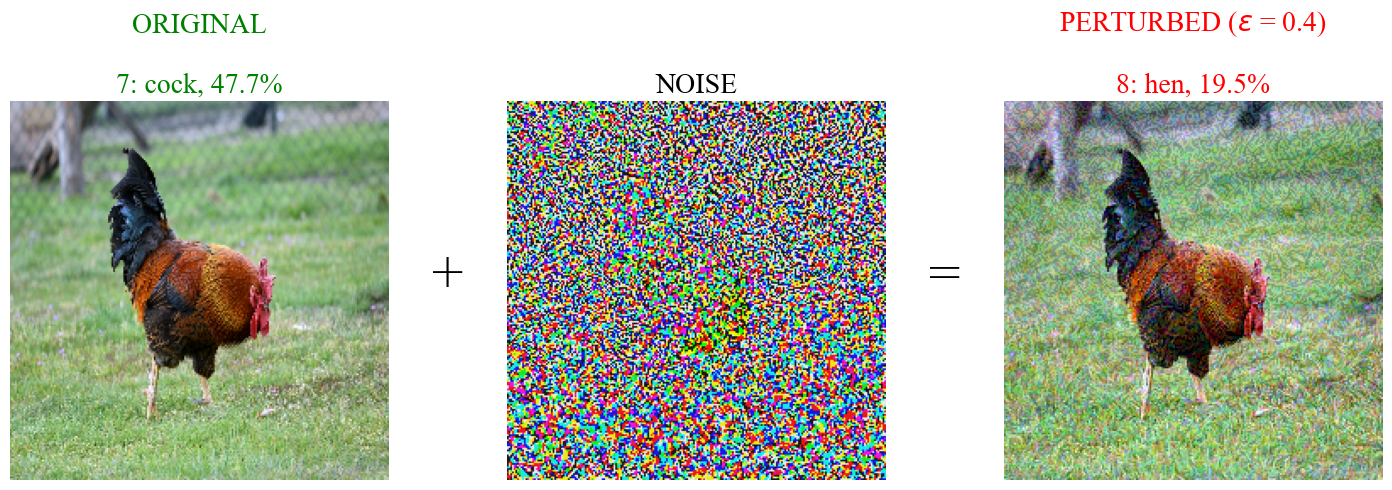

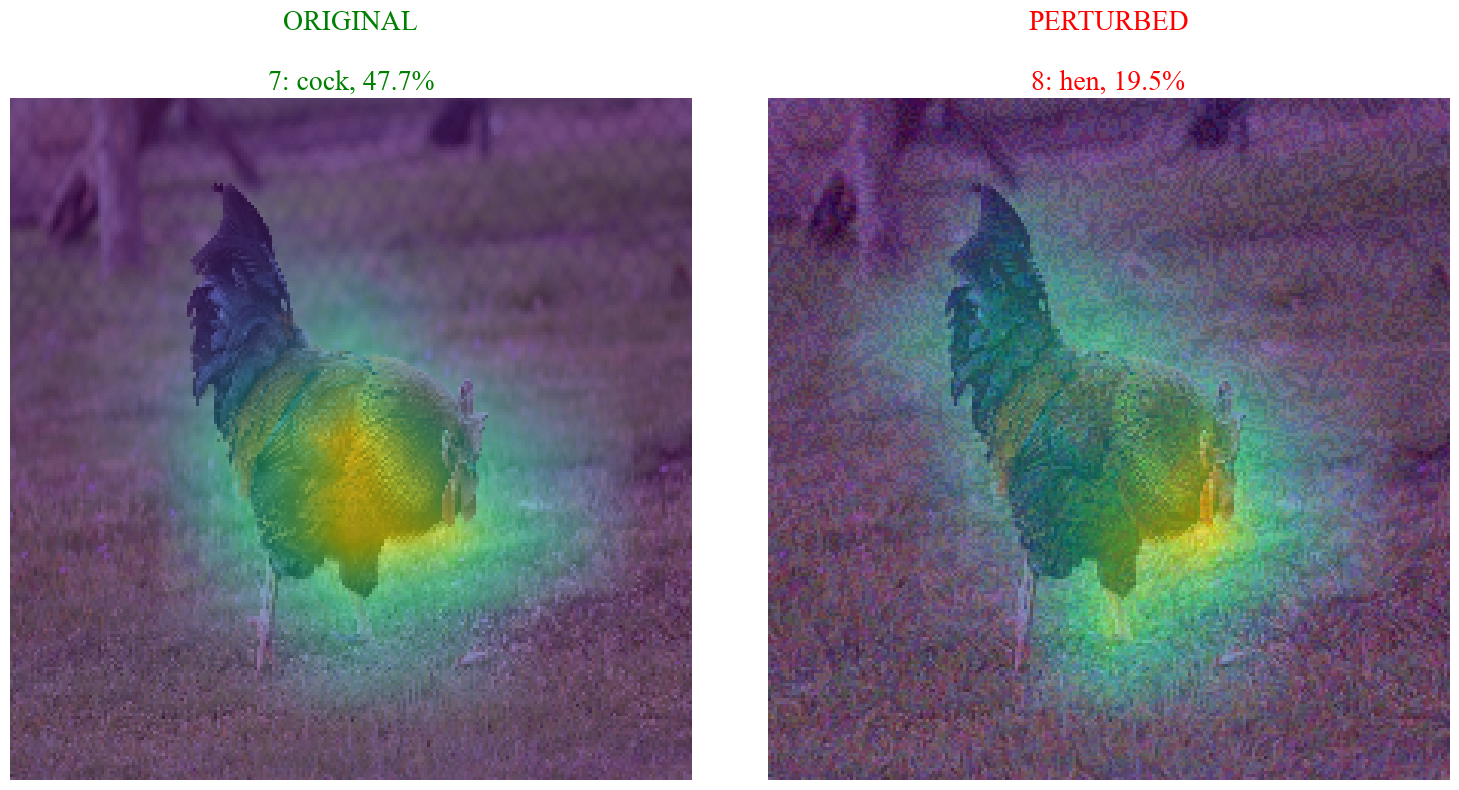

In [4]:
for tripla in triplas:

    preds_display(model, tripla, epsilon_fgsm, show_noise = True)
    
    gradcam_display(model, tripla)
    
    del tripla

del model, triplas, epsilon_fgsm